In [55]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt

In [56]:
tofind="pmed15"

def create_values_matrix(name:str,data_path:str,n_runs:int,n_gens:int):
    files=os.listdir(data_path)
    files=[f for f in files if tofind in f]
    info_values=np.zeros((n_runs,n_gens))
    diversity_values=np.zeros_like(info_values)
    for f in files:
        info=extract_information(os.path.join(data_path,f))
        info_values[info['run'],info['generation']]=info['value']
        diversity_values[info['run'],info['generation']]=info['div']
    max_size=max_generations(info_values)
    info_values=info_values[:,:max_size+1]
    diversity_values=diversity_values[:,:max_size+1]
    return info_values,diversity_values
    

def extract_information(name:str):
    info={}
    info['run']=int(name.split('_')[-3])-1
    info['generation']=int(name.split('_')[-1].split('.')[0])
    with open(name,'r') as f:
        lines=f.readlines()
    f.close()
    info['sol']=np.array(lines[0].split(" ")[:-1],dtype=int)
    info['value']=float(lines[1])
    info['div']=float(lines[2])
    return info

def max_generations(datos:np.array):
    nz=np.max(np.nonzero(datos)[1])
    return nz

# BNP sin generación elitista

In [57]:
data,data_div=create_values_matrix(tofind,'./BNP-Secuencial/BNPOUTPUTS',30,500)

Text(0, 0.5, 'Mejor valor por generacion')

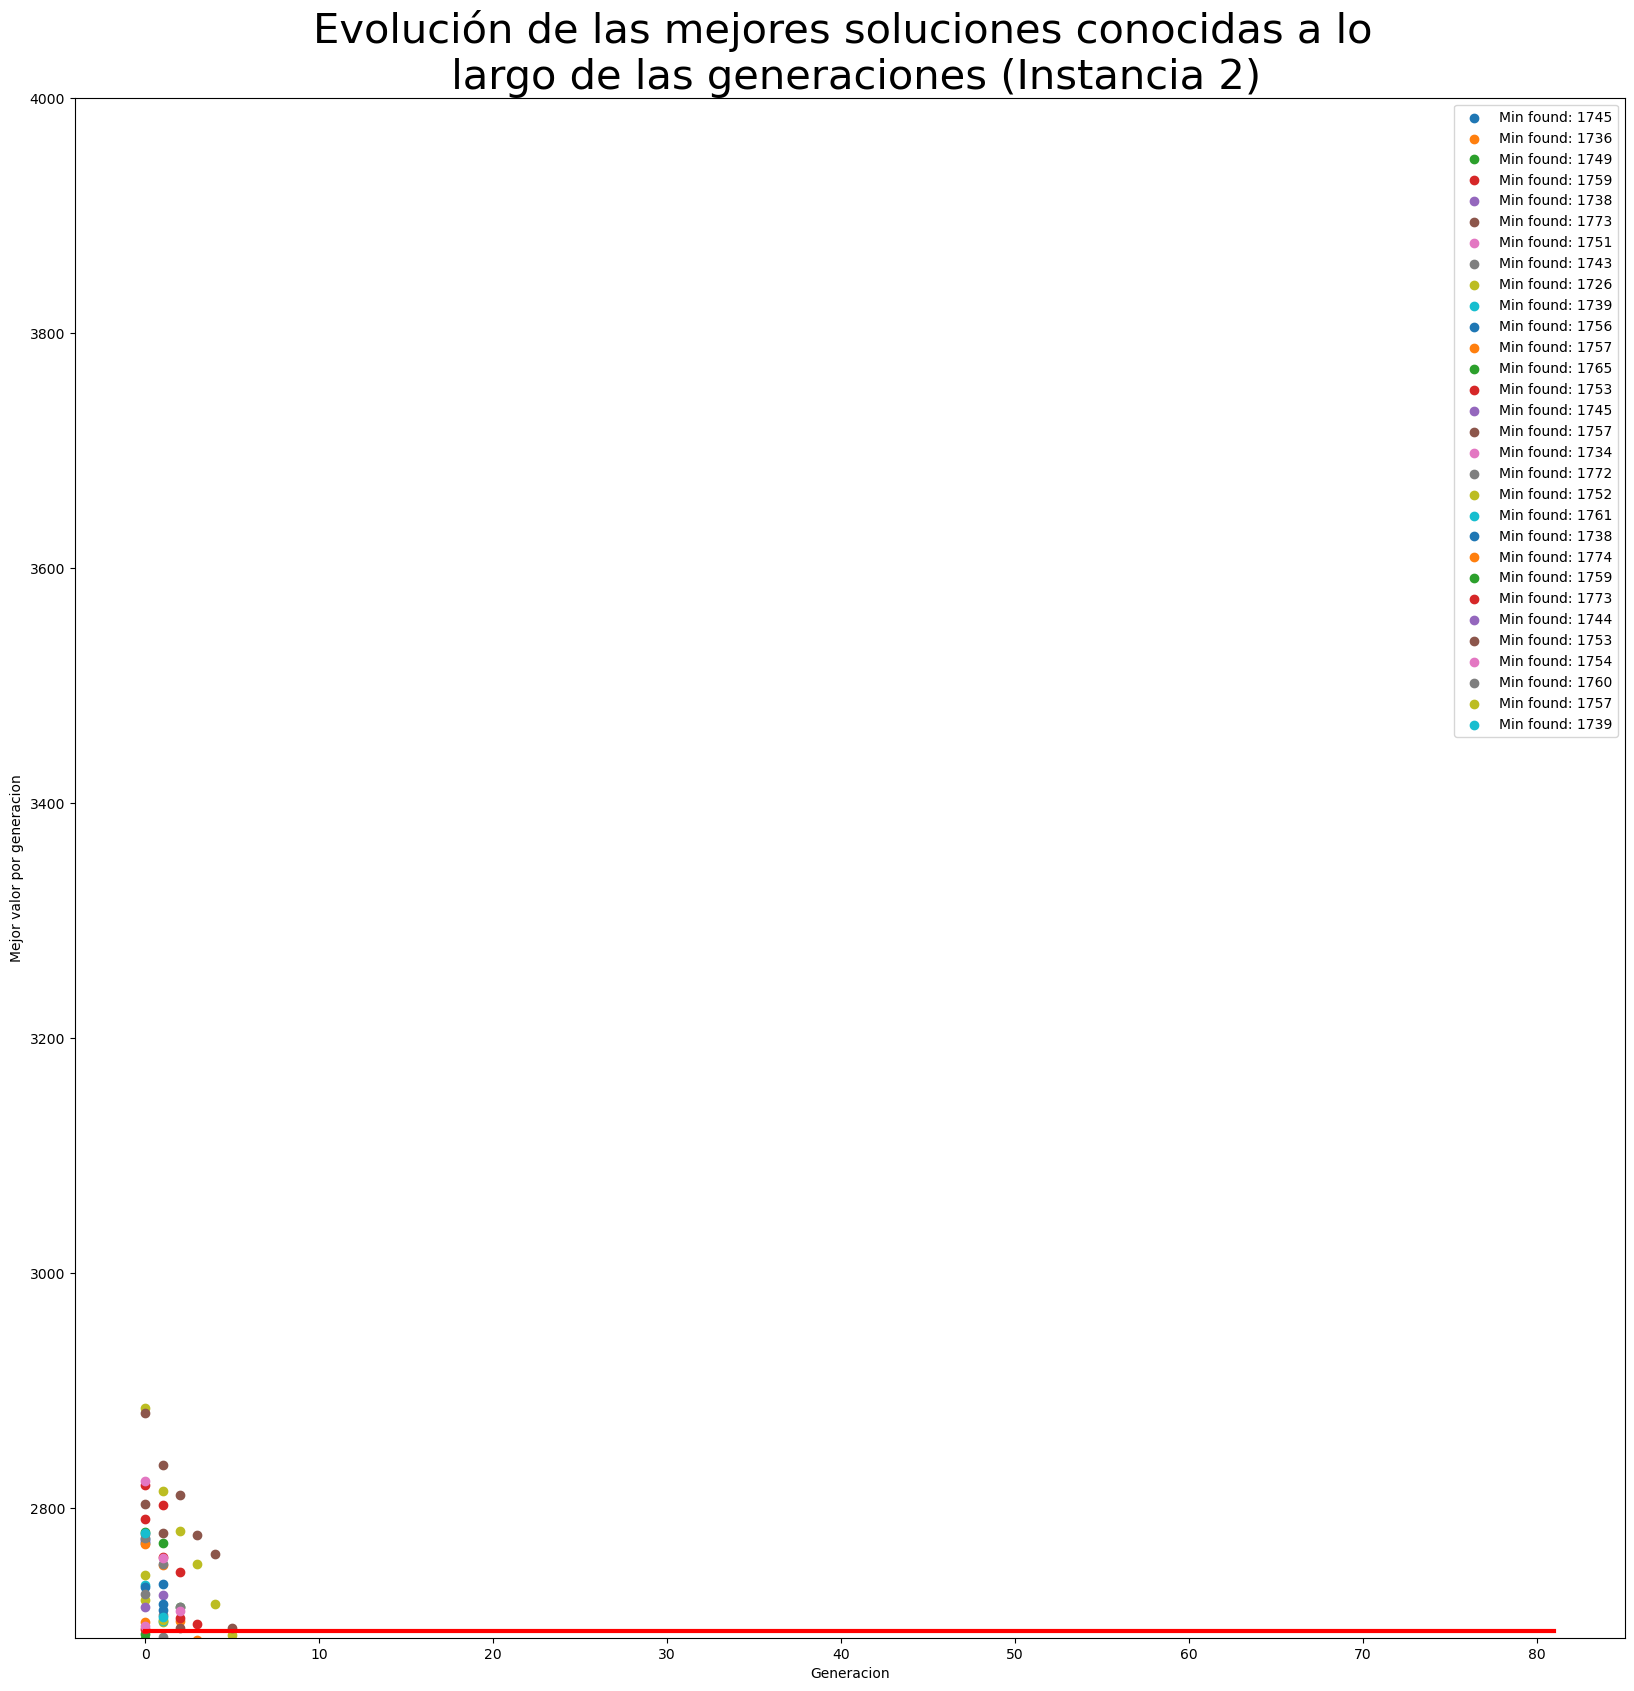

In [58]:
tostats=[]
plt.figure(figsize=(20,20))
for i in range(data.shape[0]):
    plt.ylim(2690,4000)
    plt.scatter(range(data.shape[-1]),data[i],label="Min found: {}".format(int(np.min(data[i][data[i]>0]))))
    tostats.append(int(np.min(data[i][data[i]>0])))

abline=np.repeat(2696,repeats=data.shape[-1])
plt.plot(range(data.shape[-1]),abline,color='red',linewidth=3)
plt.legend()
plt.title("Evolución de las mejores soluciones conocidas a lo \n largo de las generaciones (Instancia 2)",fontsize=30)
plt.xlabel("Generacion")
plt.ylabel("Mejor valor por generacion")


In [59]:
print(round(np.mean(tostats)),np.max(tostats),np.min(tostats))

1752 1774 1726


Text(0.5, 1.0, 'Evolución de la diversidad a lo \n largo de las generaciones (Instancia 3)')

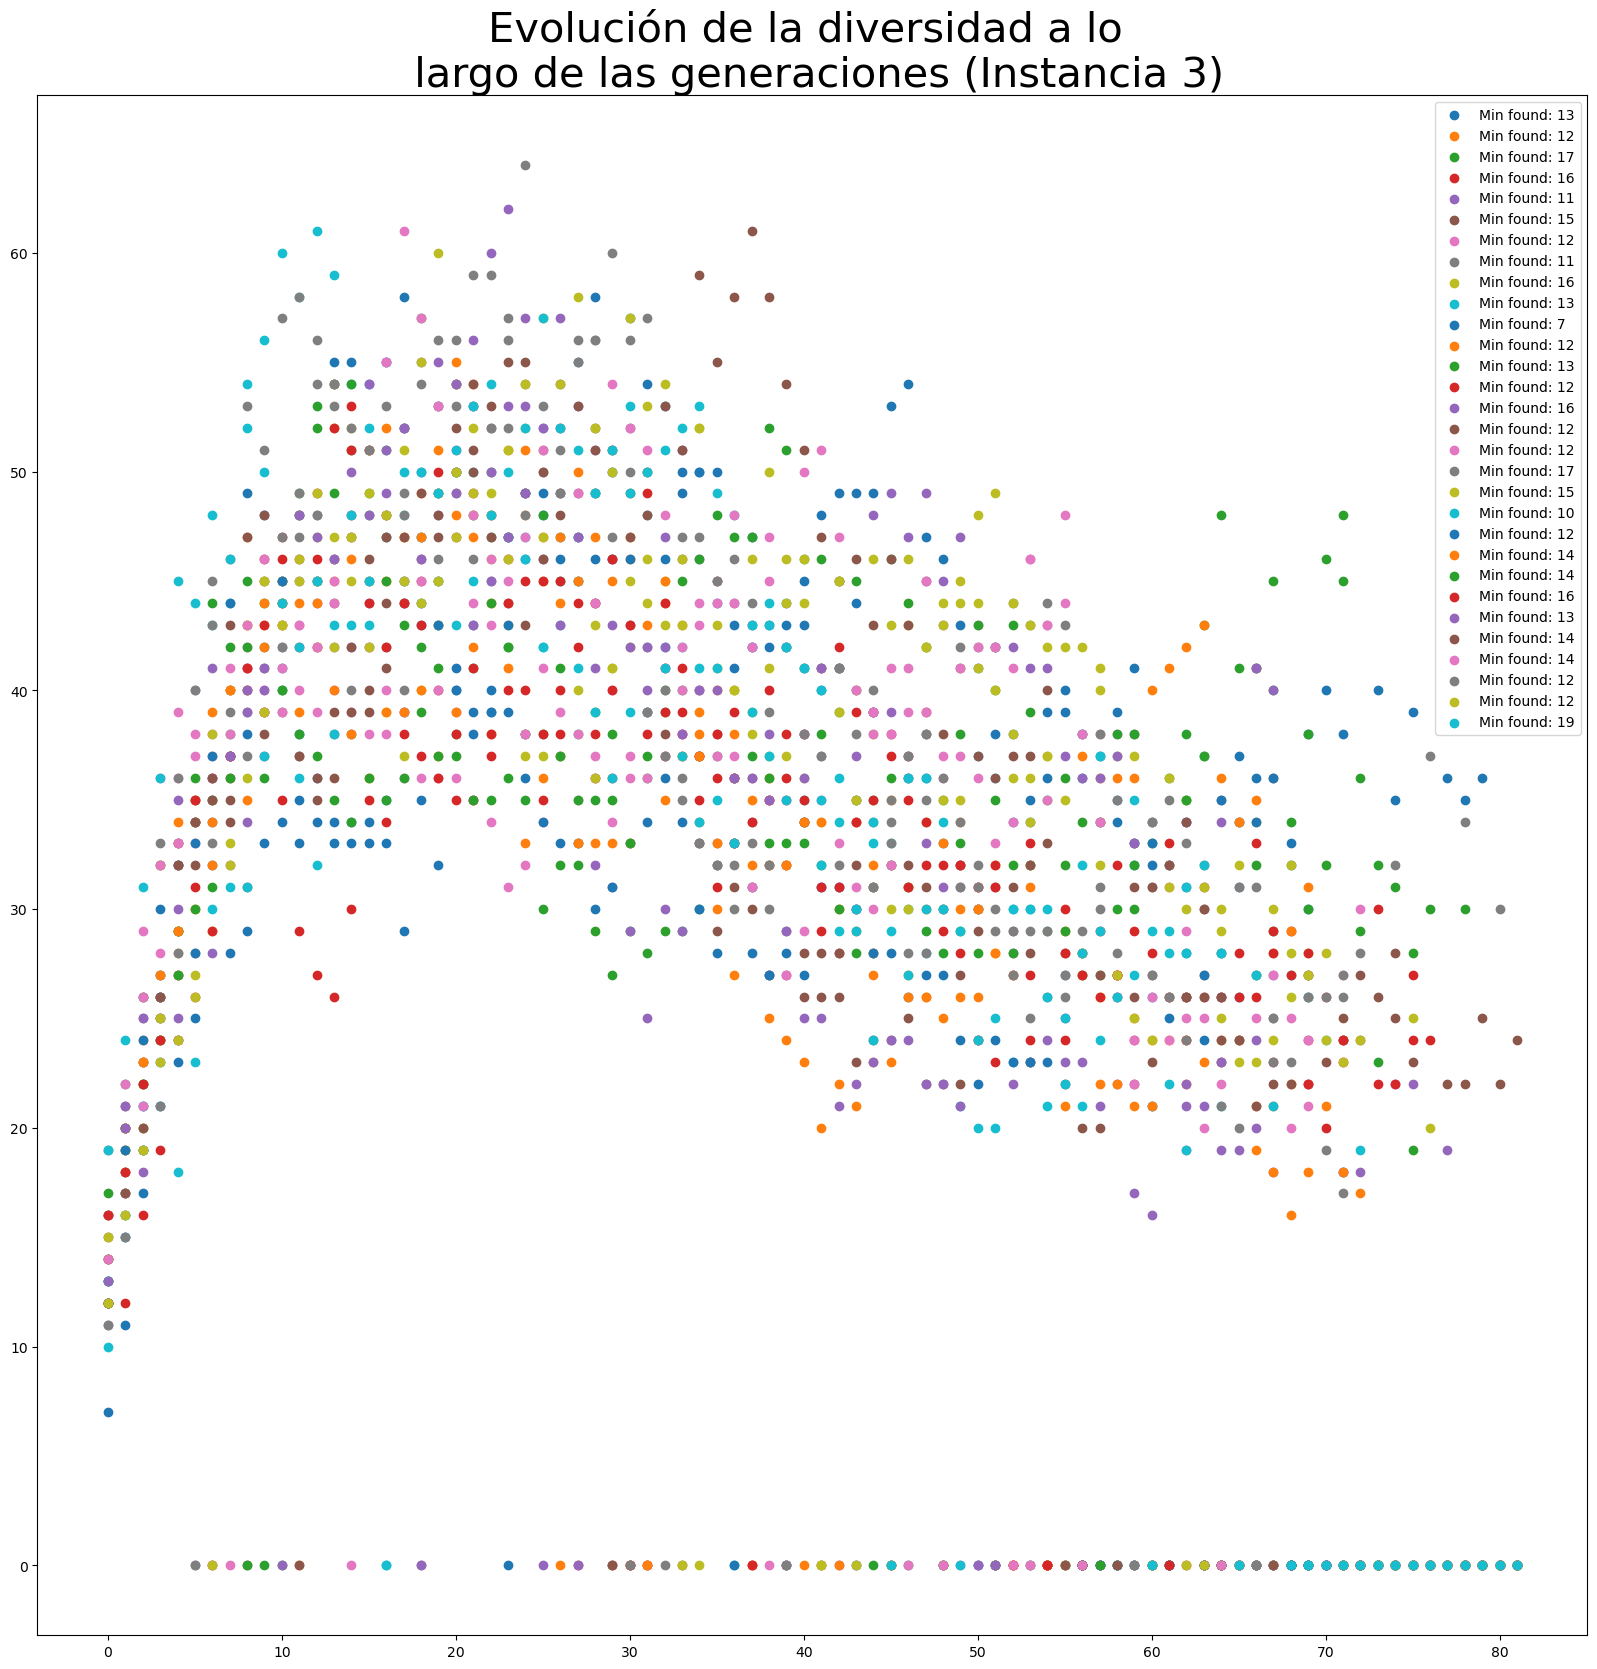

In [60]:
plt.figure(figsize=(20,20))
for i in range(data_div.shape[0]):
    #plt.ylim(0,5)
    plt.scatter(range(data_div.shape[-1]),data_div[i],label="Min found: {}".format(int(np.min(data_div[i][data_div[i]>0]))))
plt.legend()
plt.title("Evolución de la diversidad a lo \n largo de las generaciones (Instancia 3)",fontsize=30)

# BNP con selección elitista

In [61]:
data,data_div=create_values_matrix(tofind,'./BNP-Secuencial/ELITEBNP',30,500)

Text(0, 0.5, 'Mejor valor por generacion')

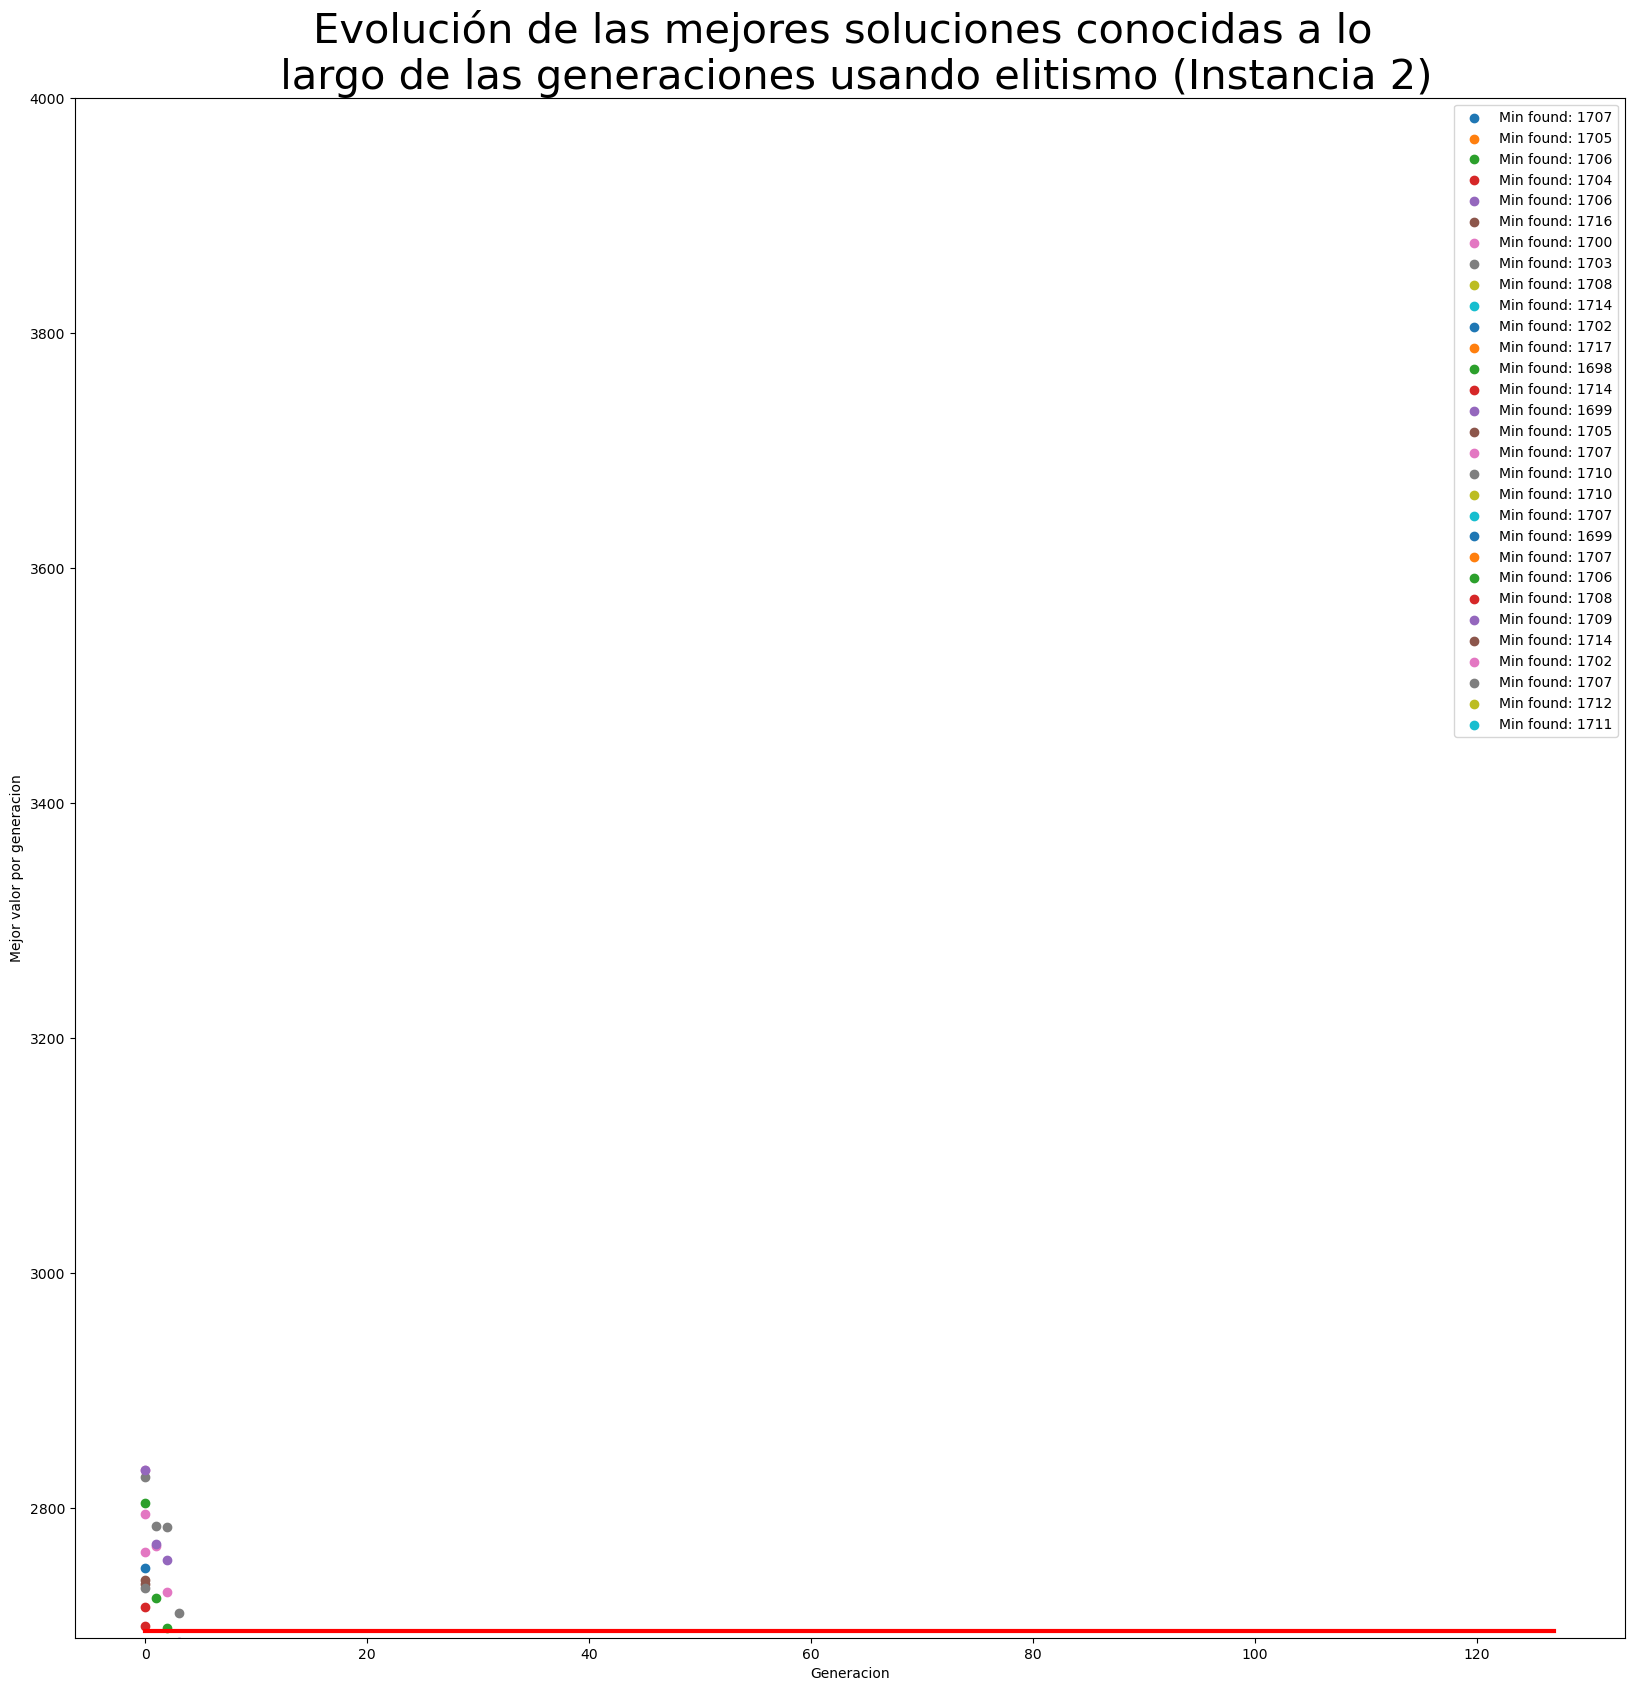

In [62]:
tostats=[]
plt.figure(figsize=(20,20))
for i in range(data.shape[0]):
    tostats.append(int(np.min(data[i][data[i]>0])))
    plt.ylim(2690,4000)
    plt.scatter(range(data.shape[-1]),data[i],label="Min found: {}".format(int(np.min(data[i][data[i]>0]))))

abline=np.repeat(2696,repeats=data.shape[-1])
plt.plot(range(data.shape[-1]),abline,color='red',linewidth=3)
plt.legend()
plt.title("Evolución de las mejores soluciones conocidas a lo \n largo de las generaciones usando elitismo (Instancia 2)",fontsize=30)
plt.xlabel("Generacion")
plt.ylabel("Mejor valor por generacion")


In [63]:
print(round(np.mean(tostats)),np.max(tostats),np.min(tostats))

1707 1717 1698


Text(0.5, 1.0, 'Evolución de la diversidad a lo \n largo de las generaciones usando elitismo (Instancia 3)')

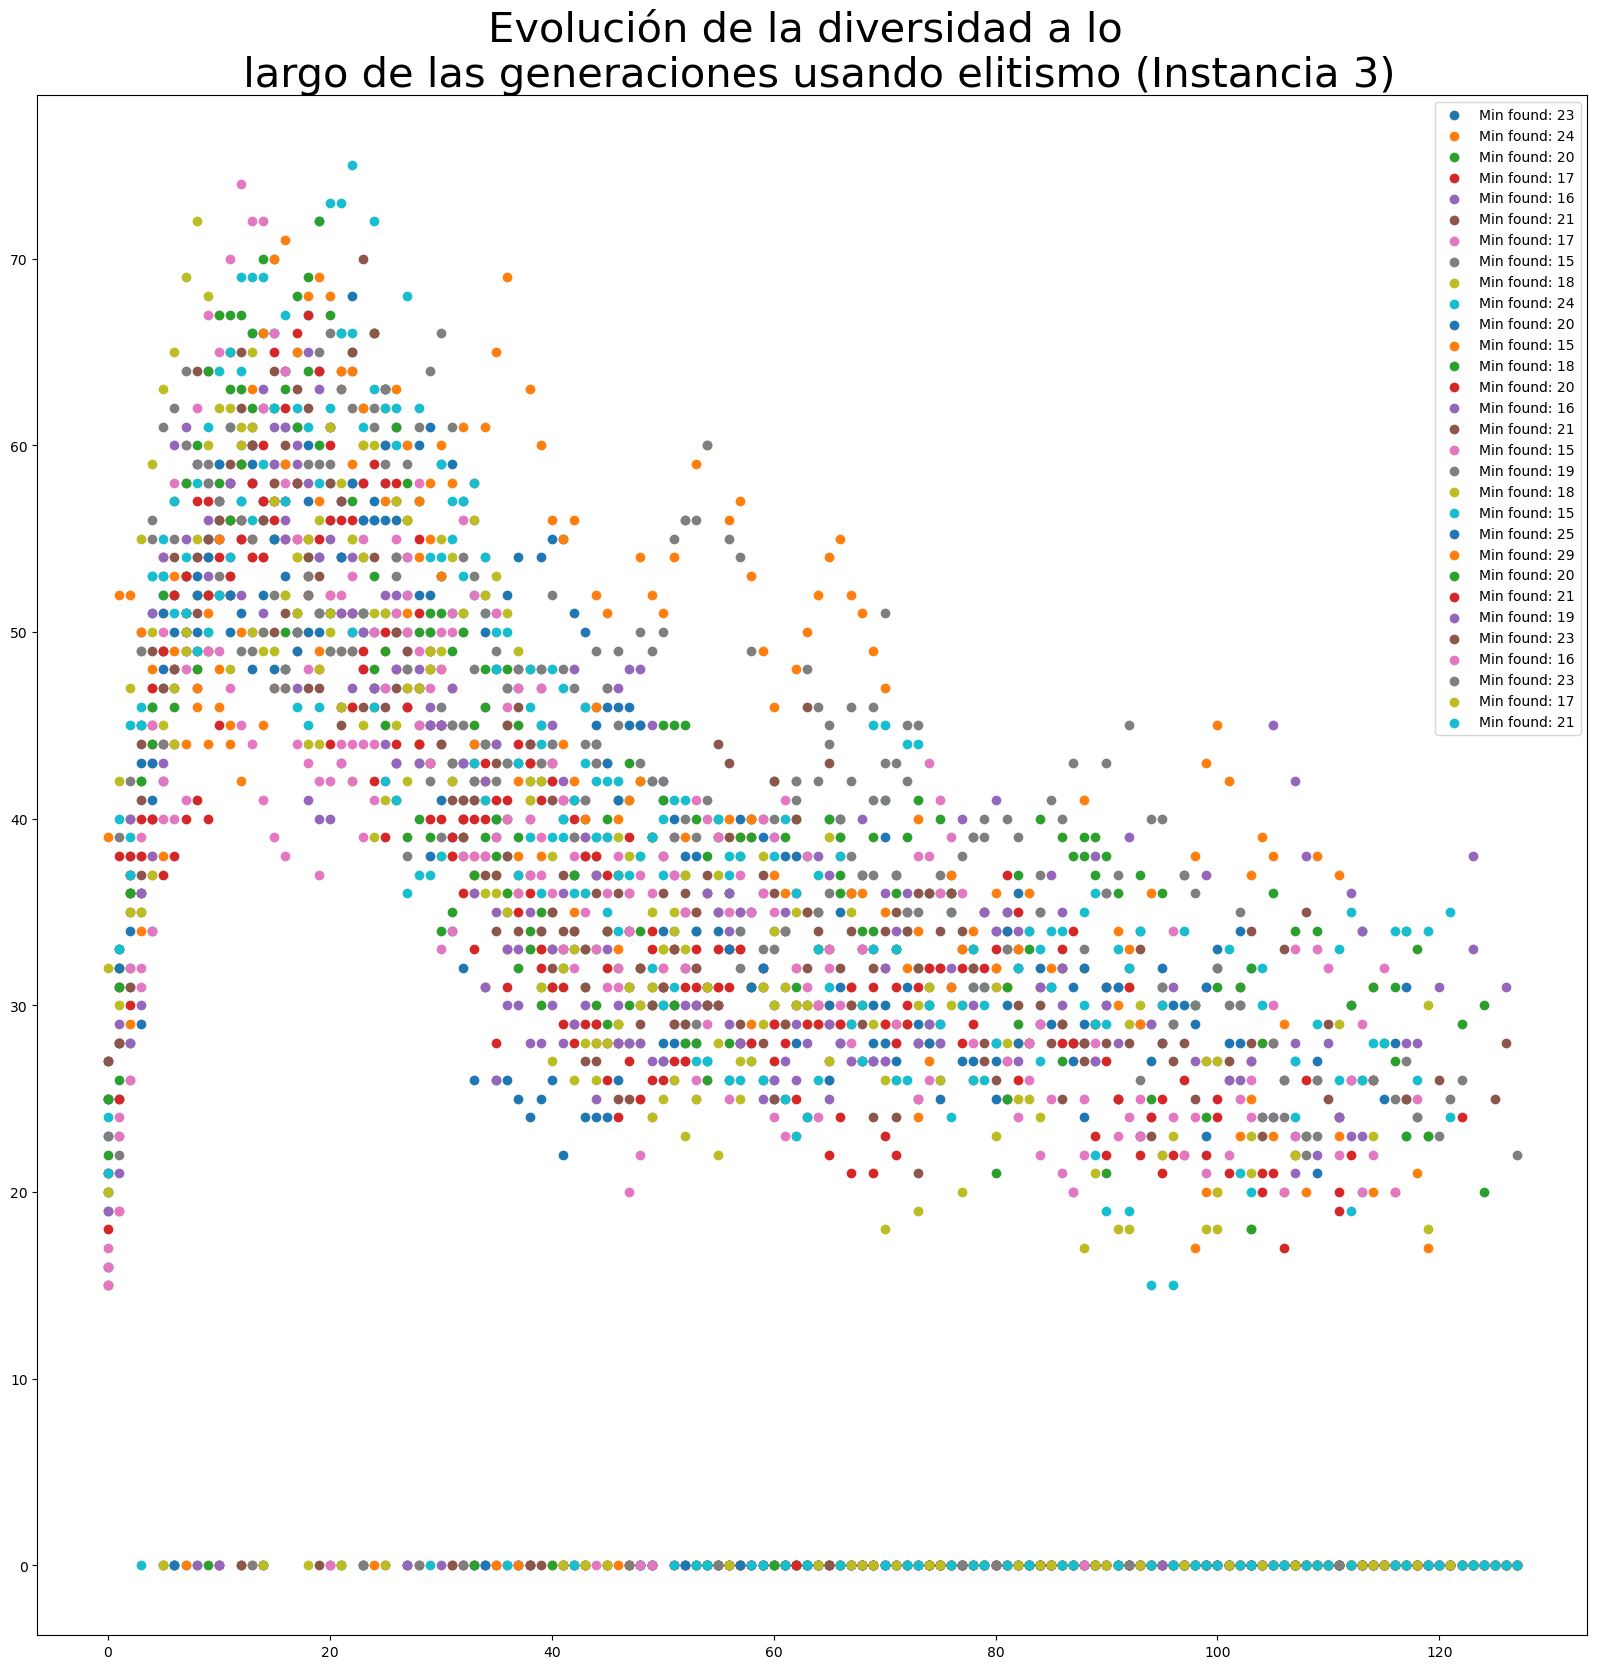

In [64]:
plt.figure(figsize=(20,20))
for i in range(data_div.shape[0]):
    #plt.ylim(0,5)
    plt.scatter(range(data_div.shape[-1]),data_div[i],label="Min found: {}".format(int(np.min(data_div[i][data_div[i]>0]))))
plt.legend()
plt.title("Evolución de la diversidad a lo \n largo de las generaciones usando elitismo (Instancia 3)",fontsize=30)